In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval

In [2]:
recipes = pd.read_csv('../../data/foodcom_recipes.csv')
recipes['ingredient_ids'] = recipes['ingredient_ids'].apply(lambda x: literal_eval(x))
recipes['technique_ids'] = recipes['technique_ids'].apply(lambda x: literal_eval(x))
recipes['ingredient_names'] = recipes['ingredient_names'].apply(lambda x: literal_eval(x))
recipes['technique_names'] = recipes['technique_names'].apply(lambda x: literal_eval(x))
recipes['steps'] = recipes['steps'].apply(lambda x: literal_eval(x))
recipes['tags'] = recipes['tags'].apply(lambda x: literal_eval(x))
recipes['submitted'] = recipes['submitted'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))

interactions = pd.read_csv('../../data/foodcom_interactions.csv')
interactions['date'] = interactions['date'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))

recipes['average_rating'] = recipes['recipe_id'].apply(
    lambda x: interactions[interactions['recipe_id'] == x]['rating'].mean() if x in interactions['recipe_id'].values else np.nan
)

recipes['n_rating'] = recipes['recipe_id'].apply(
    lambda x: len(interactions[interactions['recipe_id'] == x]) if x in interactions['recipe_id'].values else 0
)

In [3]:
print(len(recipes), len(interactions))
display(recipes.head(1))
display(interactions.head(1))

178265 718379


,recipe_id,recipe_name,description,n_steps,n_ingredients,ingredient_ids,technique_ids,steps,minutes,contributor_id,...,sugar,sodium,protein,saturated fat,carbohydrates,ingredient_names,technique_names,average_rating,n_ratings,n_rating
0,424415,aromatic basmati rice rice cooker,from the ultimate rice cooker cookbook. the a...,6,5,"[389, 7655, 6270, 1527, 3406]","[9, 16, 51]","[rinse the rice in a fine strainer , then drai...",61,496803,...,2.0,8.0,9.0,1.0,15.0,"[basmati rice, water, salt, cinnamon stick, gr...","[combine, drain, strain]",4.833333,6,6


,user_id,recipe_id,rating,date
0,2046,4684,5.0,2000-02-25


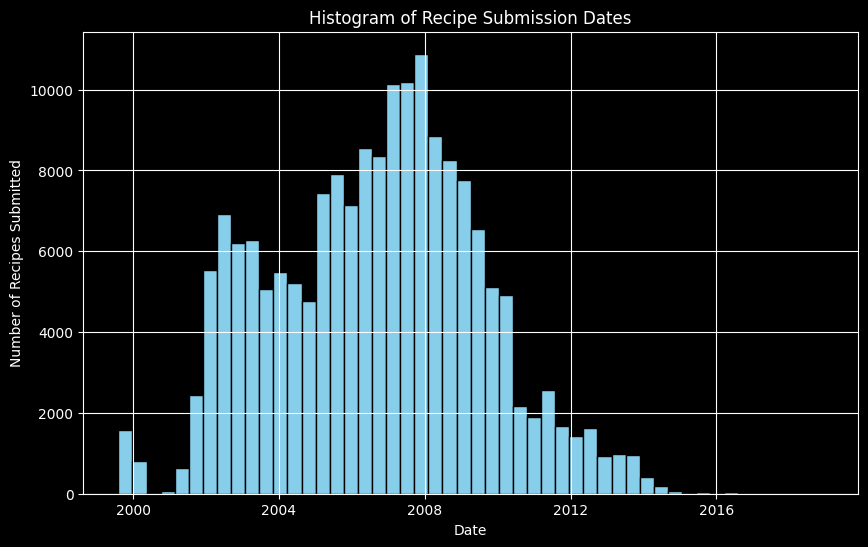

In [4]:
plt.figure(figsize=(10, 6))
recipes['submitted'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Recipe Submission Dates')
plt.xlabel('Date')
plt.ylabel('Number of Recipes Submitted')
plt.show()


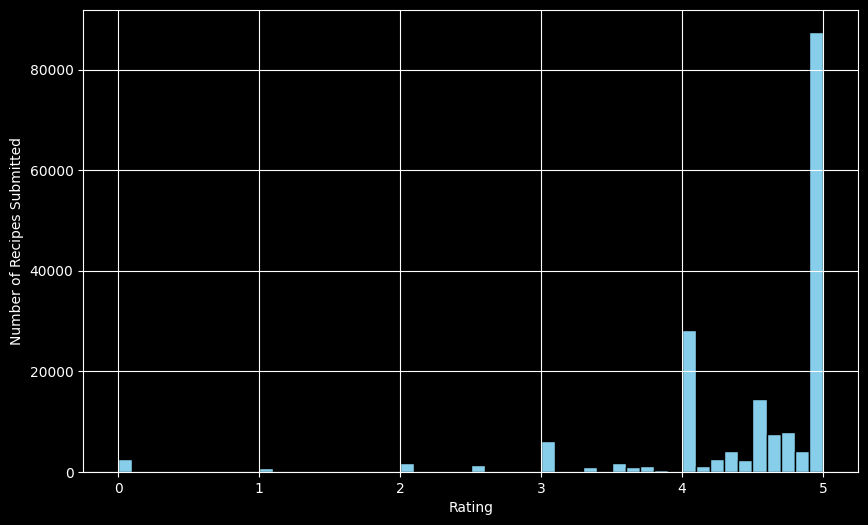

In [5]:
plt.figure(figsize=(10, 6))
recipes['average_rating'].hist(bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Number of Recipes Submitted')
plt.show()

In [6]:
recipes['n_rating']

0           6
1           1
2           1
3         119
4           1
         ... 
178260      1
178261      2
178262      1
178263     29
178264      1
Name: n_rating, Length: 178265, dtype: int64

In [10]:
# plt.figure(figsize=(10, 6))
# recipes['n_rating'].hist(bins=1, color='skyblue', edgecolor='black')
# plt.xlabel('Num')
# plt.ylabel('Number of Recipes Submitted')
# plt.show()


In [8]:
recipes_2000_2005 = recipes[(recipes['submitted'] >= datetime.datetime(2000, 1, 1)) & (recipes['submitted'] < datetime.datetime(2006, 1, 1))]
interactions_2000_2005 = interactions[(interactions['date'] >= datetime.datetime(2000, 1, 1)) & (interactions['date'] < datetime.datetime(2006, 1, 1))]
print(len(recipes_2000_2005), len(interactions_2000_2005))

68407 122856
